In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
data = pd.read_csv('final_dataframe.csv')
data

,Unnamed: 0,participant,trial,onset_ms,difficulty,correctResponse,participantResponse,RT,errorLR,isComission,isOmission,time_ms,ECG,filtered_ecg,normalized_ecg,RR_intervals,Heart_Rate,HRV,RMSSD,SDNN
0,1,1,3,11342,0,0,0,0.395806,0,NaN,0.0,11342,-172.5,-15.836893,-0.058880,2.798,21.443888,7.828,7.828,2.515000
1,2,1,11,21968,0,1,1,0.687468,0,NaN,0.0,21968,154.0,-48.734000,-0.183536,10.626,5.646527,-2.750,2.750,4.320176
2,3,1,15,27046,0,2,1,0.534686,0,NaN,0.0,27046,179.5,-91.812792,-0.346774,5.078,11.815675,3.946,3.946,3.784834
3,4,1,16,28242,1,0,0,0.638847,0,NaN,0.0,28242,163.5,-103.752097,-0.445721,1.196,50.167224,-2.336,2.336,3.992489
4,5,1,17,29852,1,0,0,0.798577,0,NaN,0.0,29852,207.0,-103.752097,-0.392016,1.610,37.267081,5.426,5.426,3.874637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,3980,9,492,712734,1,0,0,0.541629,0,NaN,0.0,712734,-290.0,101.858347,0.387101,4.040,14.851485,446.740,446.740,990.523787
3980,3981,9,494,715244,1,0,0,0.458256,0,NaN,0.0,715244,-36.0,25.407515,0.097407,2.510,23.904382,-444.098,444.098,990.424418
3981,3982,9,496,717886,1,1,1,0.506915,0,NaN,0.0,717886,51.0,-15.012882,-0.055757,2.642,22.710068,445.196,445.196,990.325192
3982,3983,9,497,718984,0,0,0,0.374999,0,NaN,0.0,718984,-18.5,-15.012882,-0.096331,1.098,54.644809,-441.588,441.588,990.225622


In [3]:
# EDA: Display basic information about the data
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3984 non-null   int64  
 1   participant          3984 non-null   int64  
 2   trial                3984 non-null   int64  
 3   onset_ms             3984 non-null   int64  
 4   difficulty           3984 non-null   int64  
 5   correctResponse      3984 non-null   int64  
 6   participantResponse  3984 non-null   int64  
 7   RT                   3984 non-null   float64
 8   errorLR              3984 non-null   int64  
 9   isComission          0 non-null      float64
 10  isOmission           3984 non-null   float64
 11  time_ms              3984 non-null   int64  
 12  ECG                  3984 non-null   float64
 13  filtered_ecg         3984 non-null   float64
 14  normalized_ecg       3984 non-null   float64
 15  RR_intervals         3984 non-null   f

In [4]:
print("Data Information:")
print(data.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3984 non-null   int64  
 1   participant          3984 non-null   int64  
 2   trial                3984 non-null   int64  
 3   onset_ms             3984 non-null   int64  
 4   difficulty           3984 non-null   int64  
 5   correctResponse      3984 non-null   int64  
 6   participantResponse  3984 non-null   int64  
 7   RT                   3984 non-null   float64
 8   errorLR              3984 non-null   int64  
 9   isComission          0 non-null      float64
 10  isOmission           3984 non-null   float64
 11  time_ms              3984 non-null   int64  
 12  ECG                  3984 non-null   float64
 13  filtered_ecg         3984 non-null   float64
 14  normalized_ecg       3984 non-null   float64
 15  RR_intervals        

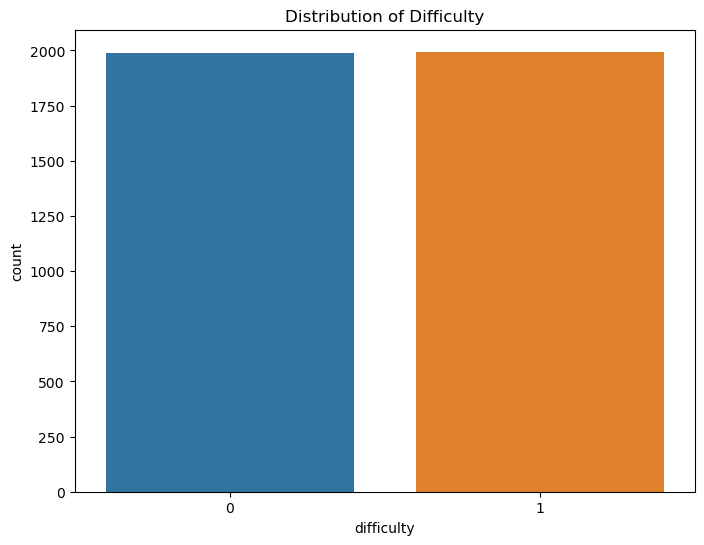

In [5]:
# Check the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='difficulty', data=data)
plt.title("Distribution of Difficulty")
plt.show()

In [6]:
#define independent variables
features = ['filtered_ecg', 'normalized_ecg', 'RR_intervals', 'Heart_Rate', 'HRV', 'RMSSD', 'SDNN']
#degine dependent variable
target = 'difficulty'

#feature matric X and target vector Y
X = data[features]
y = data[target]

In [7]:
#split data intor training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Feature scaling - standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Train a Random Forest model
rf_classifier = RandomForestClassifier(random_state=42, max_depth=10, n_estimators=300)
rf_classifier.fit(X_train_scaled, y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)


In [10]:
# Train a Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_classifier.fit(X_train_scaled, y_train)
dt_predictions = dt_classifier.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_predictions)

In [11]:
# Train a Support Vector Machine (SVM) model
svm_classifier = SVC(random_state=42, kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)

In [12]:
# Print classification reports and confusion matrices
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.47      0.49       411
           1       0.48      0.52      0.50       386

    accuracy                           0.49       797
   macro avg       0.49      0.49      0.49       797
weighted avg       0.49      0.49      0.49       797

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       411
           1       0.49      0.49      0.49       386

    accuracy                           0.50       797
   macro avg       0.50      0.50      0.50       797
weighted avg       0.50      0.50      0.50       797

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.55      0.53       411
           1       0.47      0.43      0.45       386

    accuracy                           0.49       797
   macro avg       0.49    

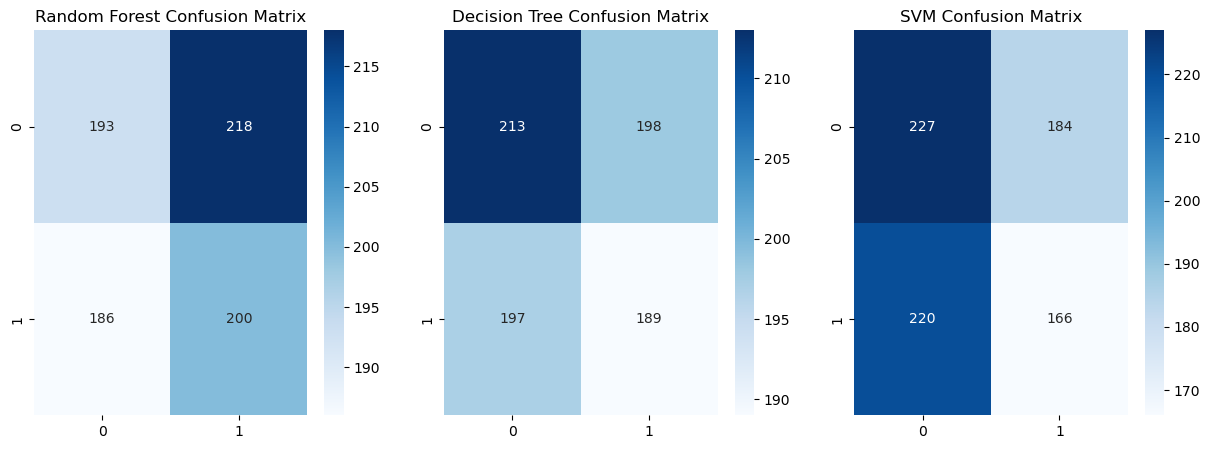

In [13]:
# Visualize confusion matrices
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.subplot(132)
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, cmap='Blues', fmt='d')
plt.title('Decision Tree Confusion Matrix')
plt.subplot(133)
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, cmap='Blues', fmt='d')
plt.title('SVM Confusion Matrix')
plt.show()

In [14]:
# Compare the accuracies of the three models
print("Random Forest Accuracy:", rf_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("SVM Accuracy:", svm_accuracy)

Random Forest Accuracy: 0.493099121706399
Decision Tree Accuracy: 0.5043914680050188
SVM Accuracy: 0.493099121706399
